In [1]:
# importing the modules we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# some extra modules for some useful types of plot
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


# Introduction

Let's import the data we need. This is the ratemyprofessors dataset we looked at previously.

In [2]:
df = pd.read_csv('https://matthew-brett.github.io/cfd2019/data/rate_my_course.csv')
df

,Discipline,Number of Professors,Clarity,Helpfulness,Overall Quality,Easiness
0,English,23343,3.756147,3.821866,3.791364,3.162754
1,Mathematics,22394,3.487379,3.641526,3.566867,3.063322
2,Biology,11774,3.608331,3.701530,3.657641,2.710459
3,Psychology,11179,3.909520,3.887536,3.900949,3.316210
4,History,11145,3.788818,3.753642,3.773746,3.053803
...,...,...,...,...,...,...
70,Anatomy,117,3.932991,3.974701,3.954188,2.863504
71,Earth Science,110,3.636182,3.671364,3.655091,3.106727
72,Linguistics,110,3.749000,3.834545,3.798182,3.309636
73,Mechanical Engineering,104,3.441923,3.531154,3.489327,2.799135


We are going to perform two linear regressions in this exercise.

First, a simple linear regression (one predictor variable, one outcome variable) - we will predict 'Clarity' from 'Helpfulness'.

Second, a multiple linear regression (several predictors, one outcome variable) - we will predict 'Clarity' from 'Easiness' and 'Helpfulness'.

Create a dataframe called ```df_reg``` which contains only the variables we need for these regressions (Easiness, Helpfulness and Clarity).

In [3]:
# answer

df_reg = df[['Easiness', 'Helpfulness', 'Clarity']].copy()

df_reg

,Easiness,Helpfulness,Clarity
0,3.162754,3.821866,3.756147
1,3.063322,3.641526,3.487379
2,2.710459,3.701530,3.608331
3,3.316210,3.887536,3.909520
4,3.053803,3.753642,3.788818
...,...,...,...
70,2.863504,3.974701,3.932991
71,3.106727,3.671364,3.636182
72,3.309636,3.834545,3.749000
73,2.799135,3.531154,3.441923


# Simple Regression Exercise

Before performing any sort of regression analysis, it is sensible to visually inspect the data.

Create a scatterplot showing the relationship between 'Helpfulness' and 'Clarity'.

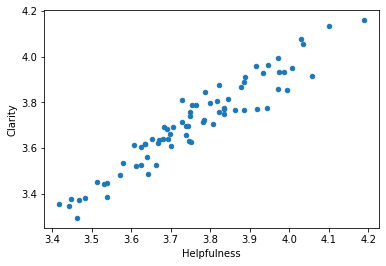

In [4]:
# answer

df_reg.plot.scatter('Helpfulness', 'Clarity');

From visual inspection do you think there is a linear relationship between these variables?

Let's perform a simple linear regression to see if your judgment is correct.

Write a function, called ```sos_error_for_minimize()``` which takes as its input a list containing an intercept and a slope.

```sos_error_for_minimize()``` should use the intercept and slope to predict Clarity rating scores from the Helpfulness rating scores stored in ```df_reg```. Remember: ```prediction = intercept + slope * predictor```.

```sos_error_for_minimize()``` should then calculate the prediction errors by subtracting these predictions from the actual Clarity scores stored in ```df_reg```. It should return the sum of the squared prediction errors.

<i> Hint: </i> you may find it helpful to refer to the 'Finding Lines' page here (https://matthew-brett.github.io/cfd2020/mean-slopes/finding_lines.html)

In [5]:
# answer

def sos_error_for_minimize(intercept_and_slope):
   
    intercept = intercept_and_slope[0]
    slope = intercept_and_slope[1]
    predicted = intercept + df_reg['Helpfulness'] * slope
    error = df_reg['Clarity'] - predicted
    return np.sum(error ** 2)

Run the cell below to check that your function is working.

In [6]:
sos_error_for_minimize([1,1])

82.81383937857056

Now use minimize, from the scipy library, to minimize the value of ```sos_error_for_minimize()```. Store the result in a variable called ```simple_reg```.

<i> Hint: </i>  again, you may want to refer to the 'Finding Lines' page here (https://matthew-brett.github.io/cfd2020/mean-slopes/finding_lines.html)

In [7]:
from scipy.optimize import minimize

# answer

simple_reg = minimize(sos_error_for_minimize, [1, 1])
simple_reg

      fun: 0.24216964323548384
 hess_inv: array([[ 3.27996844, -0.87098395],
       [-0.87098395,  0.23175775]])
      jac: array([0.00000000e+00, 3.91155481e-08])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-0.36999506,  1.08536895])

## Using regression coefficients to generate predictions

The code in the cell below uses the intercept and slope - found by ```minimize``` - to generate predicted Clarity scores from the Helpfulness scores. 

These predictions are then plotted along with the actual Clarity scores. You can see that the predictions capture the general trend pretty well.

<i> Hint: </i> paying attention to the first three lines of this code may help you later in the exercise...

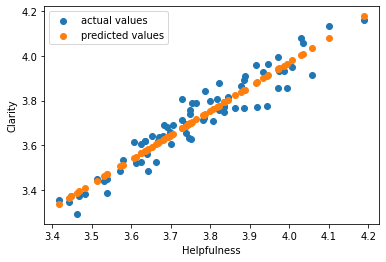

In [8]:
intercept = simple_reg.x[0]  # getting the intercept value from the output from minimize

slope = simple_reg.x[1]      # getting the slope value for the predictor from the output from minimize

predicted_values_simple_reg = intercept + df_reg['Helpfulness'] * slope   # generating the predictions


# generating the scatter plot
plt.scatter(df_reg['Helpfulness'], df_reg['Clarity'], label = 'actual values')
plt.scatter(df_reg['Helpfulness'], predicted_values_simple_reg, label = 'predicted values')
plt.xlabel('Helpfulness')
plt.ylabel('Clarity')
plt.legend();

# Moving to Multiple Regression

Predicting the values of one outcome variable from one predictor variable is useful. However, often we are interested in the relationships between multiple variables. This brings us to multiple regression. 

Once again, before performing any analysis it is sensible to visually inspect the data.

```pairplot()``` from the seaborn library is a useful function to inspect the relationship between multiple predictor variables and one outcome variable. It was imported at the start of this notebook using ```import seaborn as sns```. This function might be useful to you in your projects. 

The cell below contains code which generates a pairplot which shows Number of Professors and Clarity as the predictor (x) variables, and Overall Quality as the outcome (y) variable.

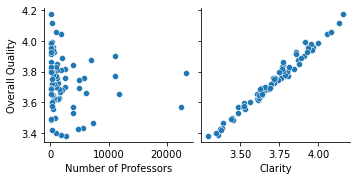

In [9]:
# creating a pairplot

sns.pairplot(data = df, x_vars = ['Number of Professors', 'Clarity'], y_vars = 'Overall Quality');

You can see that, from visual inspection, it looks like there is a strong linear relationship between Clarity and Overall Quality, but not between Number of Professors and Overall Quality.

As mentioned earlier, for our multiple regression we are going to predict Clarity from Easiness and Helpfulness.

Modify the ```sns.pairplot()``` code to generate a pairplot which uses 'Easiness' and 'Helpfulness' as the predictors (x_vars) and 'Clarity' as the outcome (y_vars).

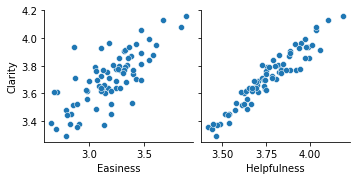

In [10]:
# answer

sns.pairplot(data = df_reg , x_vars = ['Easiness', 'Helpfulness'], y_vars = 'Clarity');

Do you think Easiness and Helpfulness look like they have a linear relationship with clarity?

To show the relationship further, run the code in the cell below to generate a 3D scatter plot. 

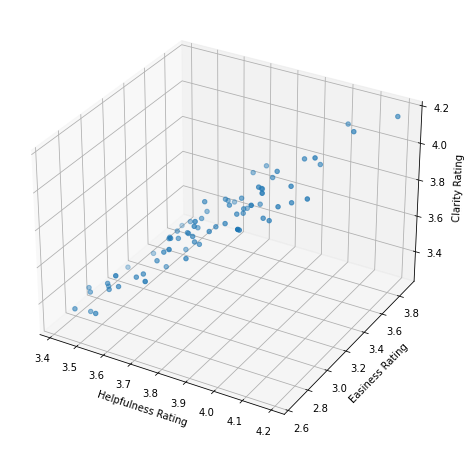

In [11]:
# do not worry about this code, it just generates a 3d plot

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_reg['Helpfulness'], df_reg['Easiness'], df_reg['Clarity'])
plt.xlabel('Helpfulness Rating')
plt.ylabel('Easiness Rating')
ax.set_zlabel('Clarity Rating');

# Multiple Regression

The functions in the three cells below give us the machinery we need for multiple regression using ```minimize```. They are modified from the 'Simple and multiple regression' textbook page (https://matthew-brett.github.io/cfd2020/classification/single_multiple.html).

Read the docstring and the comments in the cells and make sure you understand what each line of the function is doing. 

<b> Remember to run all three cells. </b>

In [12]:
def predict(intercept, slopes, row):
    """ Predict a value given an intercept, slopes and corresponding row values
    """
    return intercept + np.sum(slopes * np.array(row))

In [13]:
def rmse(intercept, slopes, attributes, y_values):
    """ Root mean square error for prediction of `y_values` from `attributes`

    Use `intercept` and `slopes` multiplied by `attributes` to give prediction.

    `attributes` is a data frame with numerical attributes to predict from.
    """
    errors = []  # create an empty list, to store the prediction errors
    
    for i in np.arange(len(y_values)):  # for every observation in the dataset (`i` is the index of the current observation)
        
        predicted = predict(intercept, slopes, attributes.iloc[i])  # call the predict() function and apply it to the
                                                                    # current row of the attributes dataframe, using
                                                                    # the intercept and slope values
            
        actual = y_values.iloc[i]        # get the actual value of the outcome variable for this observation
        
        errors.append((predicted - actual) ** 2)  # calculate the squared prediction error for this observation and
                                                # append it to the 'errors' list
            
    return np.sqrt(np.mean(errors))   # return the square root of the average squared error

In [14]:
def rmse_for_params(params):
    """ RMSE for intercept, slopes contained in `params`

    `params[0]` is the intercept.  `params[1:]` are the slopes.
    """
    intercept = params[0]  # store the first value of the 'params' list in a variable called 'intercept'
    
    slopes = params[1:]    # store the rest of the values in the 'params' list in a variable called 'slopes'
        
    return rmse(intercept, # call the rmse() function and return its output
                slopes,
                df_reg.loc[:, ['Easiness', 'Helpfulness']], # the values of the predictor variables
                df_reg['Clarity']  # the values of the outcome variables
               )


<i> Note: this way of doing things takes the predictor variable values and the outcome variable values from the 'top level' e.g. they are not given to the ```rmse_for_params()``` function as arguments. Therefore, this function wouldn't work if we were using different variables as the predictors or the outcome. We would need to write another function, or use the method shown in: https://matthew-brett.github.io/cfd2020/classification/Multiple_Regression.html </i>

Use minimize to perform multiple linear regression, using the ```rmse_for_params()``` function. Predict Clarity from Easiness and Helpfulness. Store the result in a variable called ```min_multi_res```.


<i> Hint: </i> you may find it helpful to refer to the 'Simple and multiple regression' textbook page here (https://matthew-brett.github.io/cfd2020/classification/single_multiple.html)

In [15]:
# answer

min_multi_res = minimize(rmse_for_params, [0, 0, 0])
min_multi_res

      fun: 0.053454345573592056
 hess_inv: array([[27.80961037,  1.5369353 , -8.68861338],
       [ 1.5369353 ,  1.69480861, -1.83352145],
       [-8.68861338, -1.83352145,  3.85711157]])
      jac: array([9.26665962e-07, 2.79257074e-06, 3.52924690e-06])
  message: 'Optimization terminated successfully.'
     nfev: 95
      nit: 14
     njev: 19
   status: 0
  success: True
        x: array([-0.26575723,  0.10537529,  0.96830813])

Now, get the values of the intercept and slopes and store these in separate variables.


<i> Hint: </i> you may want to refer to the cell above entitled 'Using regression coefficients to generate predictions'.

In [16]:
# answer

intercept = min_multi_res.x[0]
easiness_slope = min_multi_res.x[1]
helpfulness_slope = min_multi_res.x[2]

Use the intercept and slope variables you have just created to generate predicted Clarity scores from the Easiness and Helpfulness scores.

Remember in for multiple regression: ```prediction = intercept + slope_1 * predictor_1 + slope_2 * predictor_2```

In this case Easiness and Helpfulness are the predictors.

<i> Hint: </i> again, you may want to refer to the cell above entitled 'Using regression coefficients to generate predictions'.

In [17]:
# answer

predicted_values = intercept + easiness_slope * df_reg['Easiness'] + helpfulness_slope * df_reg['Helpfulness']

predicted_values

0     3.768262
1     3.583161
2     3.604080
3     3.848022
4     3.690720
        ...   
70    3.884721
71    3.616626
72    3.796018
73    3.448447
74    3.871400
Length: 75, dtype: float64

The cell below plots the predicted values against the actual values. How well do you think multiple linear regression did at capturing the general trend in the data?

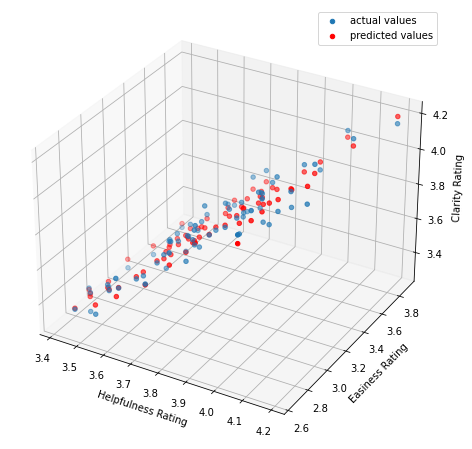

In [18]:
# do not worry about this code, it just generates the 3D plot

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_reg['Helpfulness'], df_reg['Easiness'], df_reg['Clarity'], label = 'actual values')
ax.scatter(df_reg['Helpfulness'], df_reg['Easiness'], predicted_values, label = 'predicted values', color = 'red')
plt.legend()
plt.xlabel('Helpfulness Rating')
plt.ylabel('Easiness Rating')
ax.set_zlabel('Clarity Rating');

# Linear Regression with statsmodels

We can also perform linear regression using functions from the statsmodels library.

The cell below uses statsmodels to predict Clarity from Helpfulness, using linear regression. <i> Note: </i> this is the same simple linear regression we did earlier...

In [19]:
import statsmodels.formula.api as smf

simple_model_sm = smf.ols(formula="Clarity ~ Helpfulness", data = df_reg) # create a model
simple_fit_sm = simple_model_sm.fit() # fit the model
simple_fit_sm.summary() # show the model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Clarity   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     766.1
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           1.90e-40
Time:                        14:37:33   Log-Likelihood:                 108.66
No. Observations:                  75   AIC:                            -213.3
Df Residuals:                      73   BIC:                            -208.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.3700      0.148     -2.508      0.014      -0.664      -0.076
Helpfulness     1.0854      0.039     27.679      0.000       1.007       1.164
==============================================================================
Omnibus:                        1.199   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.549   Jarque-Bera (JB):                1.262
Skew:                          -0.245   Prob(JB):                        0.532
Kurtosis:                       2.596   Cond. No.                         89.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Look at the intercept and slope values from statsmodels (shown in the table above under 'coef') . 

Let's compare those values to the intercept and slope values we got from our simple linear regression, where we predicted Clarity from Helpfulness using ```minimize```:

In [20]:
simple_reg.x

array([-0.36999506,  1.08536895])

How similar/different are the slope and intercept values that statsmodels found from the ones we found using ```minimize```? Write your answer in the cell below:

<i> Your answer here... 

Answer: the coefficients are the same. </i>

## Multiple Regression with Statsmodels

Let's perform the same multiple regression we did above, but this time using statsmodels.

Expanding on the statsmodels code presented above, use statsmodels to predict Clarity from Easiness and Helpfulness. Call the model ```multi_model_sm``` and called the fitted model ```multi_fit_sm```.

<i> Hint: </i> you may want to refer to the 'Simple and multiple regression' textbook page here (https://matthew-brett.github.io/cfd2020/classification/single_multiple.html)

In [21]:
# answer

multi_model_sm = smf.ols(formula="Clarity ~ Easiness + Helpfulness", data=df_reg)
multi_fit_sm = multi_model_sm.fit()
multi_fit_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Clarity   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     431.6
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           8.14e-41
Time:                        14:37:33   Log-Likelihood:                 113.25
No. Observations:                  75   AIC:                            -220.5
Df Residuals:                      72   BIC:                            -213.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.2658      0.144     -1.848      0.069      -0.552       0.021
Easiness        0.1054      0.034      3.060      0.003       0.037       0.174
Helpfulness     0.9683      0.053     18.160      0.000       0.862       1.075
==============================================================================
Omnibus:                        0.841   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.908
Skew:                          -0.139   Prob(JB):                        0.635
Kurtosis:                       2.538   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Again, look at the intercept and slope values from statsmodels (shown in the table above under 'coef') . 

Let's compare those values to the intercept and slope values we got from our multiple linear regression, where we predicted Clarity from Easiness and Helpfulness using ```minimize```:

In [22]:
min_multi_res.x

array([-0.26575723,  0.10537529,  0.96830813])

How similar/different are the slope and intercept values that statsmodels found from the ones we found using ```minimize```? Write your answer in the cell below:

<i> Your answer here...

Answer: the coefficients are the same. </i>

# Comparing statsmodels predictions to those from linear regression using minimize

Just for fun, let's see how close the predictions are from each method of performing multiple linear regression (```minimize``` vs statsmodels).

The ```.predict()``` method from statsmodels can be used to generate predictions from a model. The cell below uses this method to predict Easiness and Helpfulness from Clarity.

In [23]:
attributes = df_reg[['Easiness', 'Helpfulness']]
sm_predictions = multi_fit_sm.predict(attributes)
sm_predictions

0     3.768263
1     3.583160
2     3.604080
3     3.848022
4     3.690720
        ...   
70    3.884721
71    3.616626
72    3.796018
73    3.448447
74    3.871401
Length: 75, dtype: float64

Let's take these predicted Clarity values from statsmodels, and subtract them from the predictions we got from multiple regression using minimize.

If these values are small, it means the predictions from the two methods were very close.

In [24]:
minimize_vs_sm = predicted_values - sm_predictions
minimize_vs_sm 

0    -1.858902e-07
1     3.499744e-07
2    -8.531423e-08
3    -3.029513e-07
4    -3.066925e-08
          ...     
70   -8.954013e-07
71    2.792628e-07
72   -1.304179e-07
73    5.425443e-07
74   -5.966923e-07
Length: 75, dtype: float64

Plot a histogram of the differences in the predictions between the two methods.

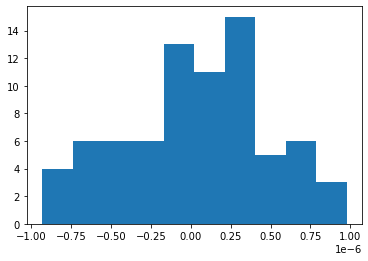

In [25]:
# answer

plt.hist(minimize_vs_sm);

Calculate the mean difference between the predictions from the two methods:

In [26]:
# answer

mean_difference_in_prediction = np.mean(minimize_vs_sm)
mean_difference_in_prediction

4.2068838019086265e-08

Finally, use ```np.count_nonzero()``` to count the number of differences in the predictions between the two methods which were larger than 0.001.

In [27]:
# answer

np.count_nonzero(minimize_vs_sm > 0.001)

0

Do you think the models are generating similar or different predictions? Why? Write your answer in the cell below:

<i> Your answer here... 

Answer: because the coefficients are the same for each method, the predictions are almost the same, so the difference between the predictions is very close to 0.</i>